<a href="https://colab.research.google.com/github/vblancoOR/econometria/blob/main/Normalidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd #librería para manejo de datos

datos= pd.read_csv("https://rtgodwin.com/data/houseprice.csv") #Lee base de datos de web...

In [3]:
import statsmodels.api as sm

y=datos["Price"]
X=datos[['Lot.Size', 'Age', 'Land.Value',   'Living.Area', 'Bedrooms']]

mco = sm.OLS(y, sm.add_constant(X)).fit()
print(mco.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     546.8
Date:                Tue, 22 Oct 2024   Prob (F-statistic):               0.00
Time:                        06:46:42   Log-Likelihood:                -21497.
No. Observations:                1728   AIC:                         4.301e+04
Df Residuals:                    1722   BIC:                         4.304e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.108e+04   6092.721      6.742      

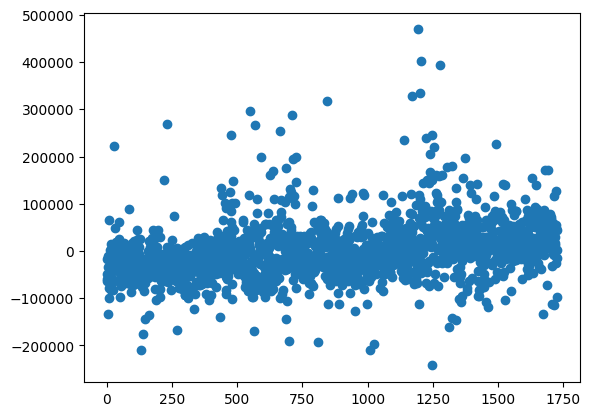

In [5]:

from matplotlib import pyplot as plt


plt.scatter(range(len(y)), mco.resid)
plt.show()

<Axes: ylabel='Count'>

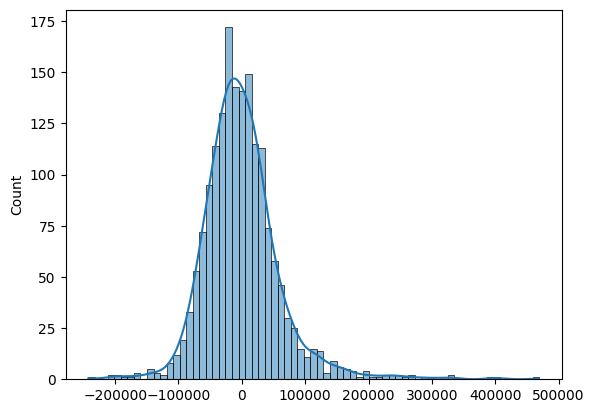

In [8]:

import seaborn as sns

sns.histplot(mco.resid, kde=True)

In [10]:
import statsmodels.stats.api as sms
sms.diagnostic.kstest_normal(mco.resid)

(0.08871103537490843, 0.0009999999999998899)

In [11]:
mco.ssr

6467288990027.137

In [18]:
sigmagorro=mco.ssr/(mco.nobs-len(mco.params)-1)
sigmagorro

3757866932.0320377

In [20]:
mco.ess

10268562802097.934

In [28]:
mco.predict([1, 0.009, 0.42, 50000, 90.6, 2])

array([84369.46006223])